In [91]:
# Import necessary libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings(action='ignore')


In [92]:
# A dataset
data = pd.read_csv('Vegetable_market.csv')

In [93]:
# first rows of market data frame
data.head()

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,winter,jan,15,no,fresh,20
1,tomato,winter,jan,15,no,fresh,50
2,peas,winter,jan,15,no,fresh,70
3,pumkin,winter,jan,15,no,fresh,25
4,cucumber,winter,jan,15,no,fresh,20


In [94]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

def preprocess_inputs(df):
    df = df.copy()
    
    # Fix typo in 'Vegetable condition'
    df['Vegetable condition'] = df['Vegetable condition'].replace({'scarp': 'scrap'})
    
    # Encode binary column
    df['Deasaster Happen in last 3month'] = df['Deasaster Happen in last 3month'].replace({'no': 0, 'yes': 1})
    
    # Encode month as ordinal values
    df['Month'] = df['Month'].replace({
        'jan': 1, 'feb': 2, 'march': 3, 'apr': 4, 'may': 5,
        'june': 6, 'july': 7, 'aug': 8, 'sept': 9,
        'oct': 10, 'nov': 11, 'dec': 12, ' ': np.NaN
    })
    df['Month'] = df['Month'].fillna(df['Month'].mode()[0])
    
    # One-hot encode categorical columns
    for column in ['Vegetable', 'Season', 'Vegetable condition']:
        df = onehot_encode(df, column)
    
    # Split into X and y
    y = df['Price per kg']
    X = df.drop('Price per kg', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale features
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
    
    return X_train, X_test, y_train, y_test


In [95]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)


In [96]:
X_train

,Month,Temp,Deasaster Happen in last 3month,Vegetable_Bitter gourd,Vegetable_Raddish,Vegetable_brinjal,Vegetable_cabage,Vegetable_califlower,Vegetable_chilly,Vegetable_cucumber,...,Vegetable_radish,Vegetable_tomato,Season_autumn,Season_monsoon,Season_spring,Season_summer,Season_winter,Vegetable condition_avarage,Vegetable condition_fresh,Vegetable condition_scrap
80,-0.807171,0.135584,-0.614043,-0.251577,-0.251577,-0.156174,-0.301511,-0.301511,-0.156174,-0.156174,...,-0.223607,-0.346410,-0.156174,-0.408248,-0.19245,-0.669534,1.024100,2.236068,-1.452966,-0.427900
38,1.067549,0.569452,1.628550,-0.251577,-0.251577,-0.156174,-0.301511,-0.301511,-0.156174,-0.156174,...,-0.223607,-0.346410,-0.156174,2.449490,-0.19245,-0.669534,-0.976467,-0.447214,0.688247,-0.427900
19,0.130189,0.894854,-0.614043,-0.251577,-0.251577,-0.156174,-0.301511,-0.301511,-0.156174,-0.156174,...,-0.223607,-0.346410,-0.156174,-0.408248,-0.19245,1.493576,-0.976467,-0.447214,0.688247,-0.427900
120,0.130189,0.786387,-0.614043,-0.251577,-0.251577,-0.156174,-0.301511,-0.301511,-0.156174,-0.156174,...,4.472136,-0.346410,-0.156174,-0.408248,-0.19245,1.493576,-0.976467,-0.447214,0.688247,-0.427900
27,0.130189,1.437189,-0.614043,-0.251577,-0.251577,-0.156174,-0.301511,-0.301511,-0.156174,-0.156174,...,-0.223607,-0.346410,-0.156174,-0.408248,-0.19245,1.493576,-0.976467,-0.447214,0.688247,-0.427900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,-0.807171,-1.057554,-0.614043,-0.251577,-0.251577,-0.156174,-0.301511,-0.301511,-0.156174,-0.156174,...,-0.223607,2.886751,-0.156174,-0.408248,-0.19245,-0.669534,1.024100,-0.447214,0.688247,-0.427900
72,2.629816,-1.057554,-0.614043,-0.251577,-0.251577,-0.156174,-0.301511,-0.301511,-0.156174,-0.156174,...,-0.223607,-0.346410,-0.156174,-0.408248,-0.19245,-0.669534,1.024100,-0.447214,-1.452966,2.336993
12,-0.807171,-1.057554,-0.614043,-0.251577,-0.251577,-0.156174,-0.301511,3.316625,-0.156174,-0.156174,...,-0.223607,-0.346410,-0.156174,-0.408248,-0.19245,-0.669534,1.024100,-0.447214,0.688247,-0.427900
107,2.629816,-0.406752,-0.614043,3.974921,-0.251577,-0.156174,-0.301511,-0.301511,-0.156174,-0.156174,...,-0.223607,-0.346410,-0.156174,-0.408248,-0.19245,-0.669534,1.024100,-0.447214,-1.452966,2.336993


In [97]:
y_train

80      32
38     250
19     100
120      9
27      20
      ... 
9       45
72      10
12      20
107     32
37      40
Name: Price per kg, Length: 84, dtype: int64

In [98]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Linear SVR": LinearSVR(),
    "SVR (RBF)": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
}


🔸 Linear Regression
   MAE:  19.22
   RMSE: 25.76
   R²:   0.71
🔸 Ridge Regression
   MAE:  19.23
   RMSE: 25.75
   R²:   0.71
🔸 Lasso Regression
   MAE:  19.41
   RMSE: 26.08
   R²:   0.70
🔸 K-Nearest Neighbors
   MAE:  28.86
   RMSE: 41.88
   R²:   0.24
🔸 Linear SVR
   MAE:  22.55
   RMSE: 36.58
   R²:   0.42
🔸 SVR (RBF)
   MAE:  31.90
   RMSE: 50.94
   R²:   -0.13
🔸 Decision Tree
   MAE:  18.53
   RMSE: 30.53
   R²:   0.60
🔸 Random Forest
   MAE:  16.92
   RMSE: 27.64
   R²:   0.67


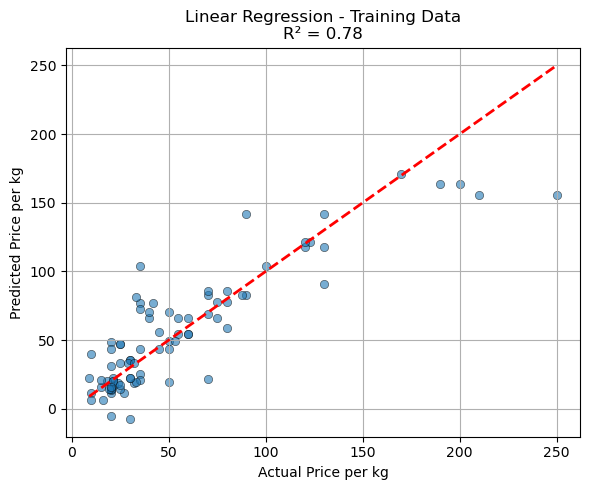

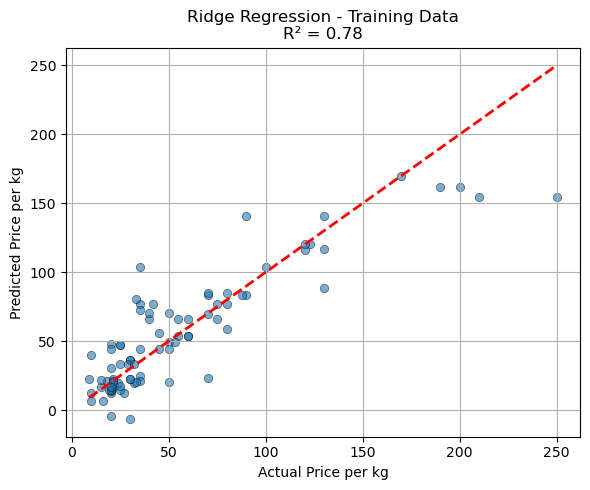

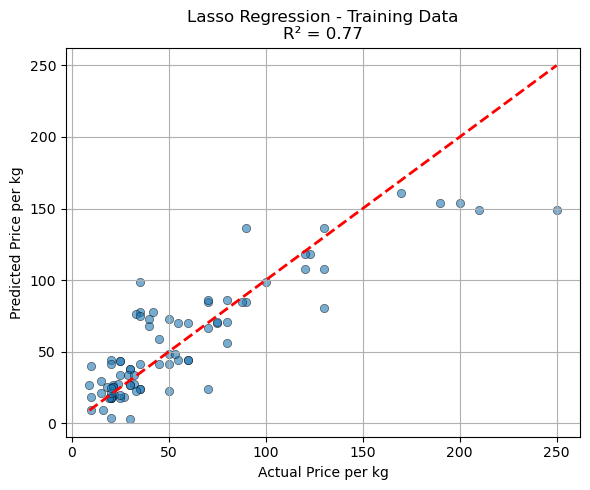

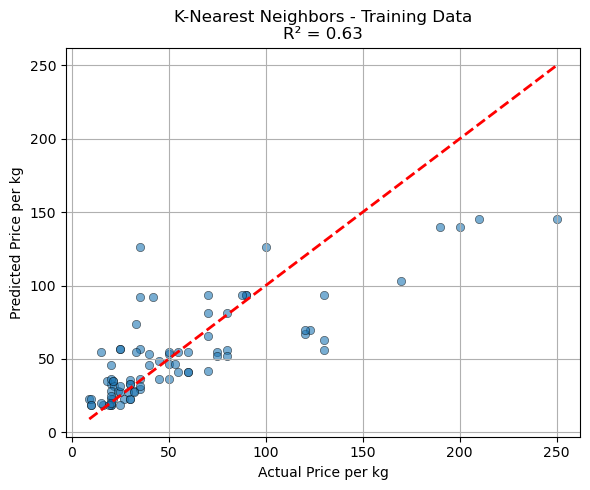

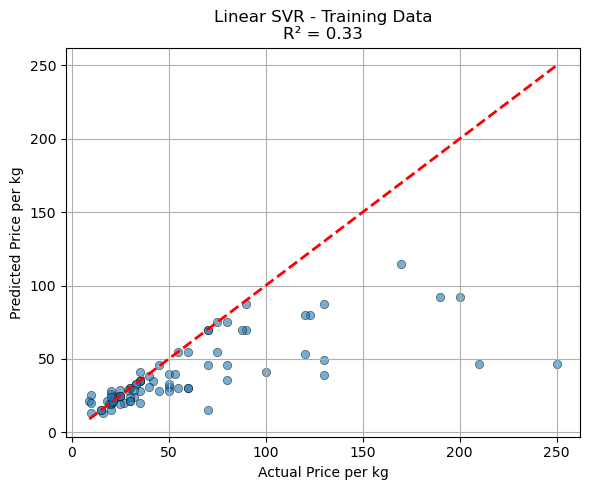

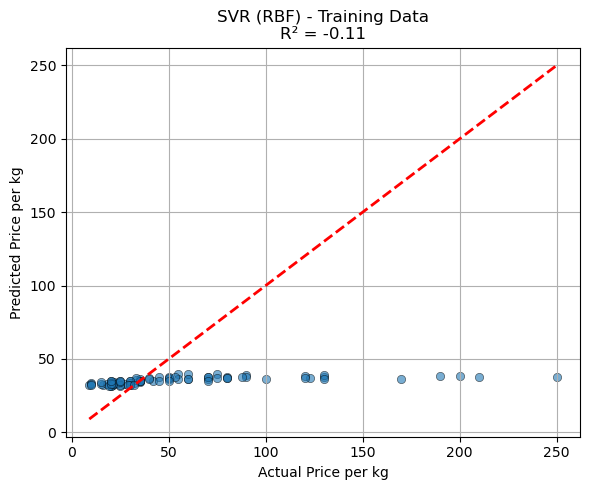

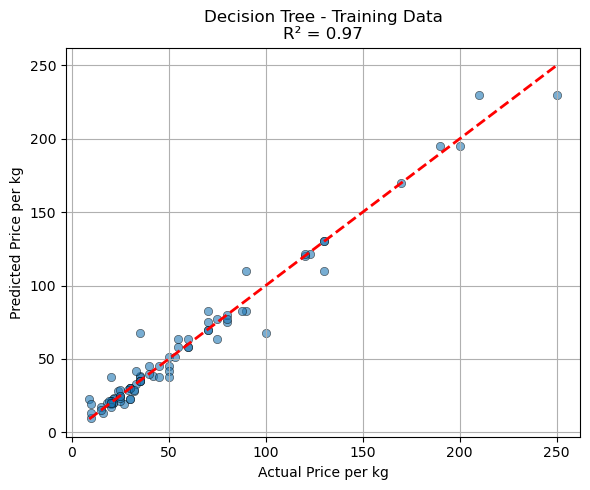

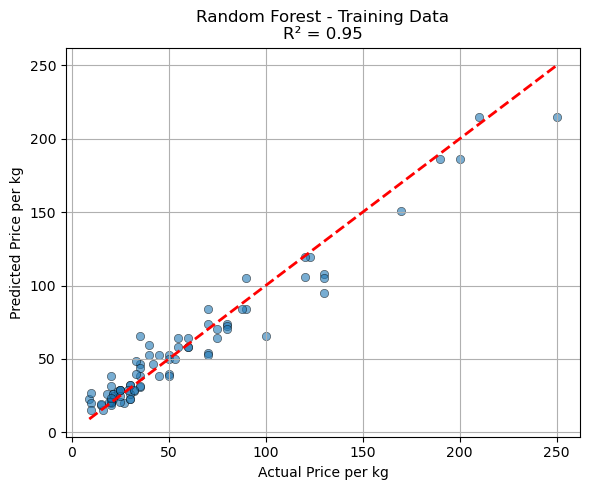

In [99]:
# After evaluating and saving best model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"🔸 {name}")
    print(f"   MAE:  {mae:.2f}")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   R²:   {r2:.2f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model
        joblib.dump(model, f'best_model_{name.replace(" ", "_")}.joblib')

        

# 📊 Training data graphs


for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)

    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    plt.xlabel('Actual Price per kg')
    plt.ylabel('Predicted Price per kg')
    plt.title(f'{name} - Training Data\nR² = {r2_score(y_train, y_train_pred):.2f}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [89]:
def decode_and_show_prediction(X_row_scaled, scaler, feature_columns, model, y_true=None, index=None):
    # Inverse scale
    X_row_original = scaler.inverse_transform([X_row_scaled])
    X_row_original = pd.DataFrame(X_row_original, columns=feature_columns)

    # Extract interpretable info
    month = int(X_row_original['Month'].values[0])
    temp = X_row_original['Temp'].values[0]
    disaster = int(round(X_row_original['Deasaster Happen in last 3month'].values[0]))

    # Get actual category names
    vegetable = [col.replace("Vegetable_", "") for col in feature_columns if "Vegetable_" in col and X_row_original[col].values[0] > 0.5]
    season = [col.replace("Season_", "") for col in feature_columns if "Season_" in col and X_row_original[col].values[0] > 0.5]
    condition = [col.replace("Vegetable condition_", "") for col in feature_columns if "Vegetable condition_" in col and X_row_original[col].values[0] > 0.5]

    # Make prediction
    prediction = model.predict([X_row_scaled])[0]

    # Print readable output
    print(f"--- Test Sample #{index} ---")
    print(f"Month: {month}")
    print(f"Temperature: {temp:.2f}")
    print(f"Disaster in last 3 months: {'Yes' if disaster == 1 else 'No'}")
    print(f"Vegetable: {vegetable[0] if vegetable else 'Unknown'}")
    print(f"Season: {season[0] if season else 'Unknown'}")
    print(f"Condition: {condition[0] if condition else 'Unknown'}")
    print(f"Predicted Price per kg: {prediction:.2f} birr")
    if y_true is not None:
        print(f"Actual Price per kg: {y_true:.2f} birr")
    print("---------------------------\n")


In [90]:
# For example, test index 0
scaler = StandardScaler()
scaler.fit(X_train)
for i in range(len(X_test)):
    X_row_scaled = X_test.iloc[i]
    y_true = y_test.iloc[i]
    decode_and_show_prediction(X_row_scaled, scaler, X_test.columns, best_model, y_true, index=i)


--- Test Sample #0 ---
Month: 1
Temperature: 0.57
Disaster in last 3 months: No
Vegetable: pointed grourd 
Season: monsoon
Condition: fresh
Predicted Price per kg: 47.47 birr
Actual Price per kg: 30.00 birr
---------------------------

--- Test Sample #1 ---
Month: 1
Temperature: 0.46
Disaster in last 3 months: No
Vegetable: okra
Season: monsoon
Condition: fresh
Predicted Price per kg: 72.35 birr
Actual Price per kg: 40.00 birr
---------------------------

--- Test Sample #2 ---
Month: 0
Temperature: 0.89
Disaster in last 3 months: No
Vegetable: peas
Season: summer
Condition: fresh
Predicted Price per kg: 103.42 birr
Actual Price per kg: 100.00 birr
---------------------------

--- Test Sample #3 ---
Month: 0
Temperature: 0.79
Disaster in last 3 months: No
Vegetable: potato
Season: summer
Condition: fresh
Predicted Price per kg: 17.75 birr
Actual Price per kg: 24.00 birr
---------------------------

--- Test Sample #4 ---
Month: 0
Temperature: 1.98
Disaster in last 3 months: No
Vegetab